In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pysam

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from pyUMI import umi_stats as stats
from pyUMI import multimap_solver as solver

In [7]:
import logging
logging.basicConfig(level=logging.INFO)

In [8]:
#st = pysam.AlignmentFile("/home/parastou/UMI/HiPSC.mult.exontag.bam","rb")
st = pysam.AlignmentFile("/data/UMI/data/Tet1.ens_exon_tagged.bam","rb")

### Mapping Stats

INFO:pyUMI.umi_stats:	Total number of reads:	    168,008,778
INFO:pyUMI.umi_stats:	Unmapped reads:		      6,516,756
INFO:pyUMI.umi_stats:	Uniquely mapped reads:	     30,722,934
INFO:pyUMI.umi_stats:	Multimapped reads:	    130,769,088


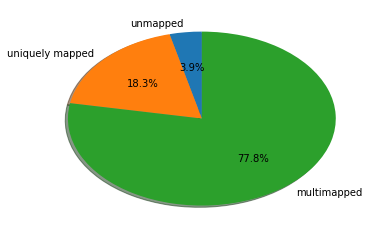

In [11]:
stats.mapping_stats(st, draw_pie=True)

### Cellular Barcode Info

INFO:pyUMI.umi_stats:  Total number of cellular barcodes: 12
INFO:pyUMI.umi_stats:  Barcode frequency:
INFO:pyUMI.umi_stats:  TCTGCA: 5,897,461
INFO:pyUMI.umi_stats:  AAAACT: 18,416,881
INFO:pyUMI.umi_stats:  CCGGAC: 25,188,239
INFO:pyUMI.umi_stats:  CCCTGG: 10,320,722
INFO:pyUMI.umi_stats:  ATCAAA: 23,164,300
INFO:pyUMI.umi_stats:  GGCGTC: 8,866,890
INFO:pyUMI.umi_stats:  GACCGC: 11,326,249
INFO:pyUMI.umi_stats:  AAAGTT: 6,044,275
INFO:pyUMI.umi_stats:  GTTCGA: 11,526,320
INFO:pyUMI.umi_stats:  ATATAG: 29,756,476
INFO:pyUMI.umi_stats:  TTAATC: 8,650,399
INFO:pyUMI.umi_stats:  TAAAGT: 8,850,566


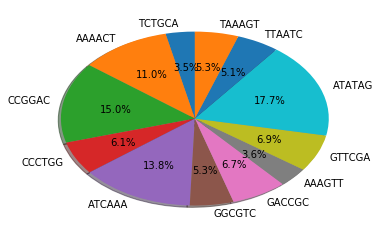

In [11]:
stats.cellbarcode_info(st, report_info=True, draw_pie=True);

### Present Flags

INFO:pyUMI.umi_stats:  Present flags: [272, 256, 4, 0, 16]


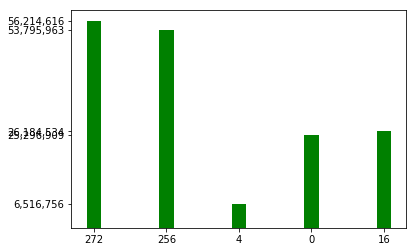

In [12]:
stats.flag_stats(st, report_info=True, draw_bar=True);

For description on BAM flags please check  https://broadinstitute.github.io/picard/explain-flags.html .

-------------------------------------------------------------------------------------------------------------------------

# Solver RANK1: 

## Resolves mutlimapped reads which their unique counterparts agree on a single gene

### Cell Barcode: ATATAG

In [99]:
m1 = solver.build_multimapping_hashtable(st, cell_barcode='ATATAG')
uh1, u1 = solver.build_uniques_associations(st, cell_barcodes=['ATATAG'])


Total number of multimapped reads: 404,975


INFO:pyUMI.multimap_solver:  Total number of gene-annotated multimapped reads : 221,868
INFO:pyUMI.multimap_solver:  Number of multimapped reads resolved to a unique gene : 133,215


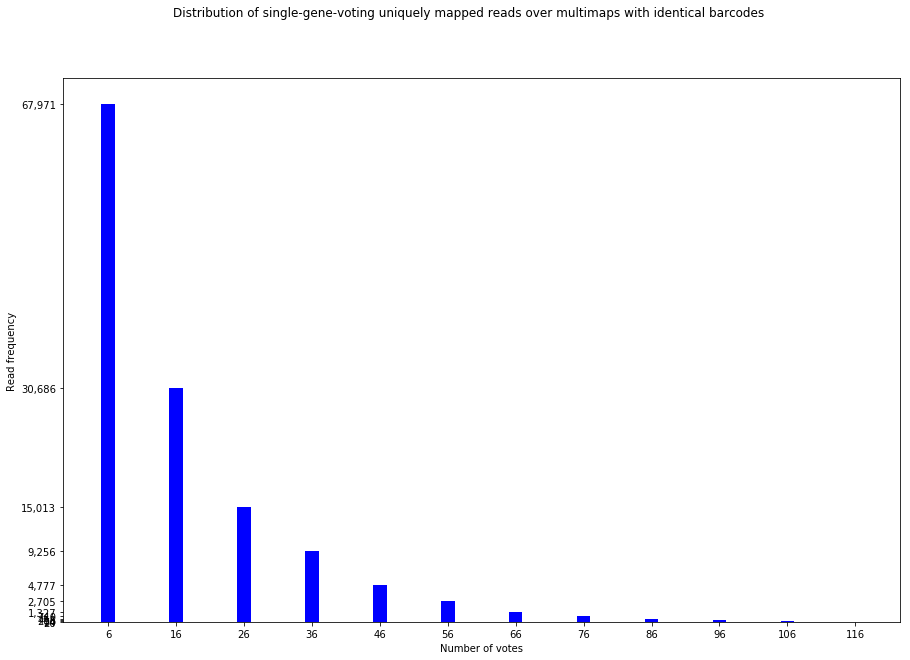

In [107]:
print;print "Total number of multimapped reads: %s" %format(len(m1),",")
r1 = solver.multimap_multigene_generator(m1,1)
savers1 = solver.rank1_multimap_solver(mm_generator=r1, uniques_hashtable=uh1, uniques=u1, report_info=True)
dist1 = solver.unique_savers_dist(savers1,m1,uh1,draw_bar=True)

-------------------------------------------------------------------------------------------------------------------------

### Cell Barcode: GGGATT

In [101]:
m2 = solver.build_multimapping_hashtable(st, cell_barcode='GGGATT')
uh2, u2 = solver.build_uniques_associations(st, cell_barcodes=['GGGATT'])


Total number of multimapped reads: 135,505


INFO:pyUMI.multimap_solver:  Total number of gene-annotated multimapped reads : 84,796
INFO:pyUMI.multimap_solver:  Number of multimapped reads resolved to a unique gene : 45,692


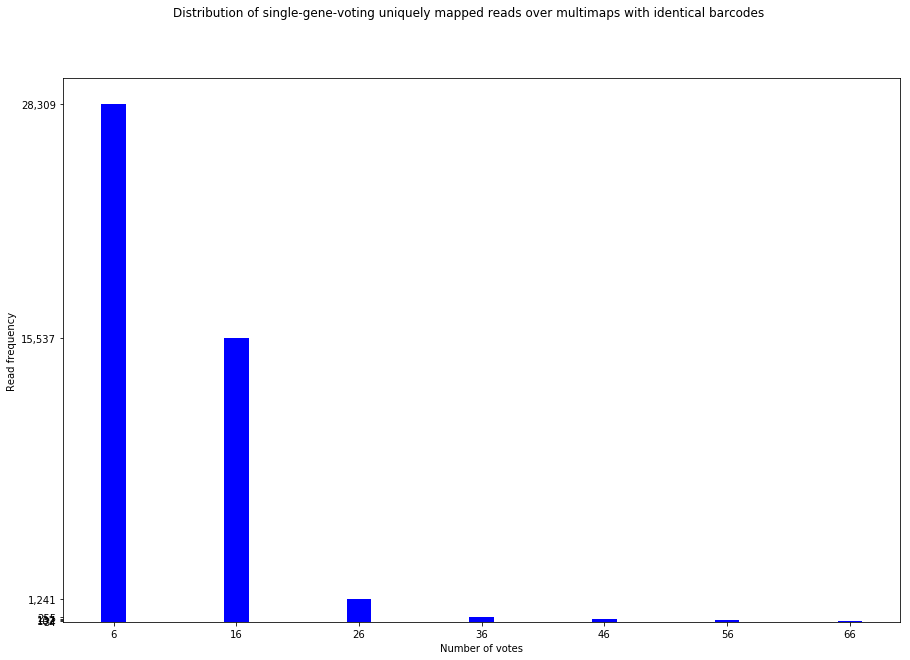

In [108]:
print;print "Total number of multimapped reads: %s" %format(len(m2),",")
r2 = solver.multimap_multigene_generator(m2,1)
savers2 = solver.rank1_multimap_solver(mm_generator=r2, uniques_hashtable=uh2, uniques=u2, report_info=True)
dist2 = solver.unique_savers_dist(savers2,m2,uh2,draw_bar=True)

--------------------------------------------------------------------------------------------------------------------

### Cell Barcode: ATCAAA

In [103]:
m3 = solver.build_multimapping_hashtable(st, cell_barcode='ATCAAA')
uh3, u3 = solver.build_uniques_associations(st, cell_barcodes=['ATCAAA'])


Total number of multimapped reads: 442,255


INFO:pyUMI.multimap_solver:  Total number of gene-annotated multimapped reads : 225,718
INFO:pyUMI.multimap_solver:  Number of multimapped reads resolved to a unique gene : 138,177


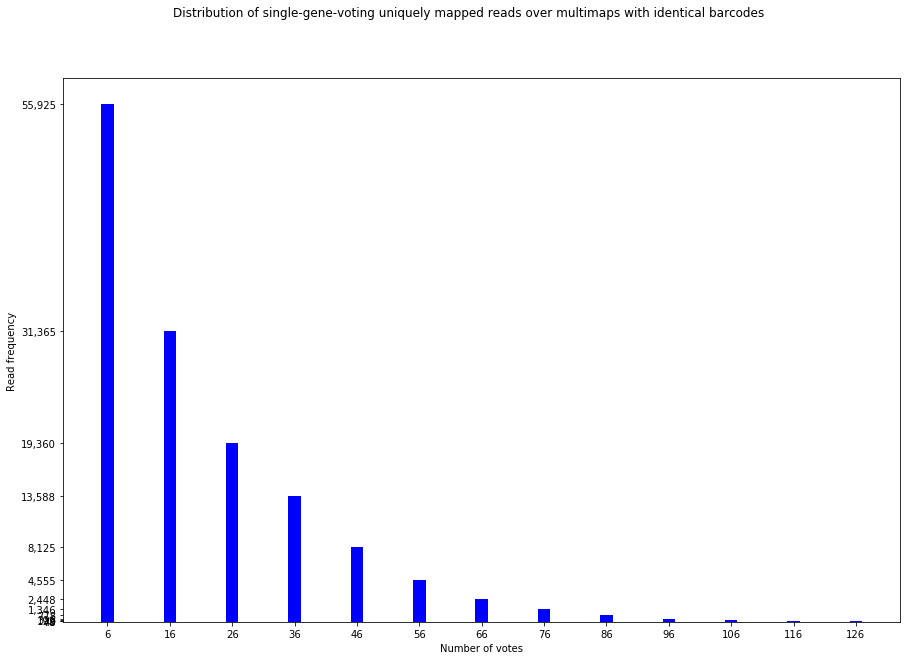

In [109]:
print;print "Total number of multimapped reads: %s" %format(len(m3),",")
r3 = solver.multimap_multigene_generator(m3,1)
savers3 = solver.rank1_multimap_solver(mm_generator=r3, uniques_hashtable=uh3, uniques=u3, report_info=True)
dist3 = solver.unique_savers_dist(savers3,m3,uh3,draw_bar=True)